In [141]:
import matplotlib.pyplot as plt
from numpy import genfromtxt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.ticker as mticker

headers = ["event_id", "track_id", "type", "delta_x", "delta_y", "delta_z", "delta_E", "process"]

def search_for_thing(column, search_param, my_data):
    electron_array = []
    for i in range(len(my_data.T[0])):
        if my_data.T[column][i] == search_param:
            electron_array.append(my_data[i])
    if len(electron_array) == 0:
        print("Couldn't find anything with", headers[column], f"= {search_param}")
    else: 
        print(headers[column], f" = {search_param}")
    return np.array(electron_array)


def find_electrons(my_data):
    arr = search_for_thing(2, 1, my_data) # look for electrons
    plt.scatter(arr.T[0], arr.T[1])
    plt.xlabel("event_id")
    plt.ylabel("track_id")
    
    
def integrate_over(event_num, track_num, data, param = 6):
    integrate = 0
    for i in range(len(data)):
        if data.T[0][i] == event_num and data.T[1][i] == track_num:
            integrate = integrate + data.T[param][i]
    return [event_num, track_num, integrate]
    

type  = 1


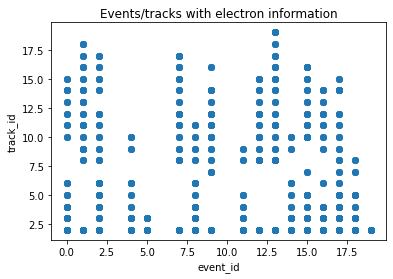

In [143]:
my_data = genfromtxt('large_detector.csv', delimiter=',')
find_electrons(my_data)

plt.title("Events/tracks with electron information")
plt.show()


type  = 1


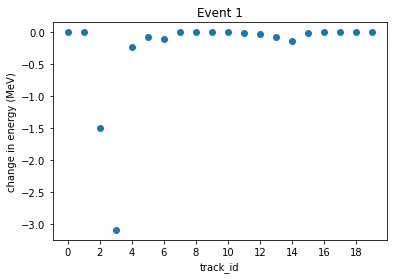

In [140]:
# only keep electron data
my_data = search_for_thing(2, 1, my_data)

# integrate energy data over track_id, event_id
integrated_energy_by_event = []
for event in range(0, 1):
    for track in range(0, 20):
        integrated_energy_by_event.append(integrate_over(event, track, my_data))

integrated_energy_by_event = np.array(integrated_energy_by_event)
plt.scatter(integrated_energy_by_event.T[1], integrated_energy_by_event.T[2])

#set x-axis to integers
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))

plt.xlabel("track_id")
plt.ylabel("change in energy (MeV)")
plt.title("Event 1")
plt.show()

type  = 1


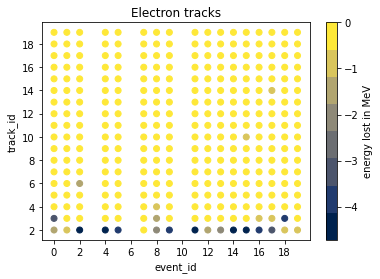

In [139]:
# only keep electron data
my_data = search_for_thing(2, 1, my_data)


# want event/track missing if not there - not zero
#print(np.unique(my_data.T[0]))
#print(np.unique(my_data.T[1]))
# integrate energy data over track_id, event_id
integrated_energy_by_event = []
for event in np.unique(my_data.T[0]):
    for track in np.unique(my_data.T[1]):
        integrated_energy_by_event.append(integrate_over(event, track, my_data))
integrated_energy_by_event = np.array(integrated_energy_by_event)

cmap = plt.cm.get_cmap("cividis", 8)

plt.scatter(integrated_energy_by_event.T[0], integrated_energy_by_event.T[1], c=integrated_energy_by_event.T[2], cmap=cmap)

plt.xlabel("event_id")
plt.ylabel("track_id")

# set axes to integers
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2))
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(2))

cbar = plt.colorbar()
cbar.set_label("energy lost in MeV")
plt.title("Electron tracks")
plt.show()



